## House price prediction

## Objectif :

* Using two different models in terms of minimizing the difference between predicted and actual rating
* using our knowledge of data preporccecing ,data visualisation  and sckit-learn library 
* appllied a new methods that there isn't in course to interpreted the result  like QQ plot 

# 📤 import labraries and  💾 show the data 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
%matplotlib inline
df=pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


* print all columns 

In [2]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [3]:
df.shape

(21613, 21)

* there is no  null values 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


* there is no duplicate value

In [6]:
df.duplicated().sum()

0

# calculate th correlation btw columns 
* we observe that price have some columns that are correlate with it  like grade and sqft_living 

In [7]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


## 📊 Exploratory Data Analysis (EDA)

# observation:
*it seem like gaussien form (normal distrubution) where the mean is null  
*thereis a big pic btw -1 and 0 

/home/malek/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

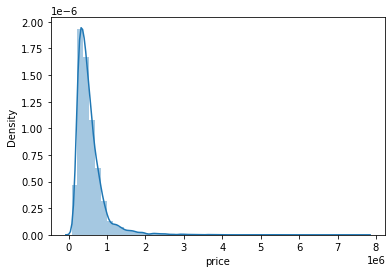

In [8]:
sns.distplot(df['price'])

show  the correlation plot  to see which variables are highly correlated using heatmap function 

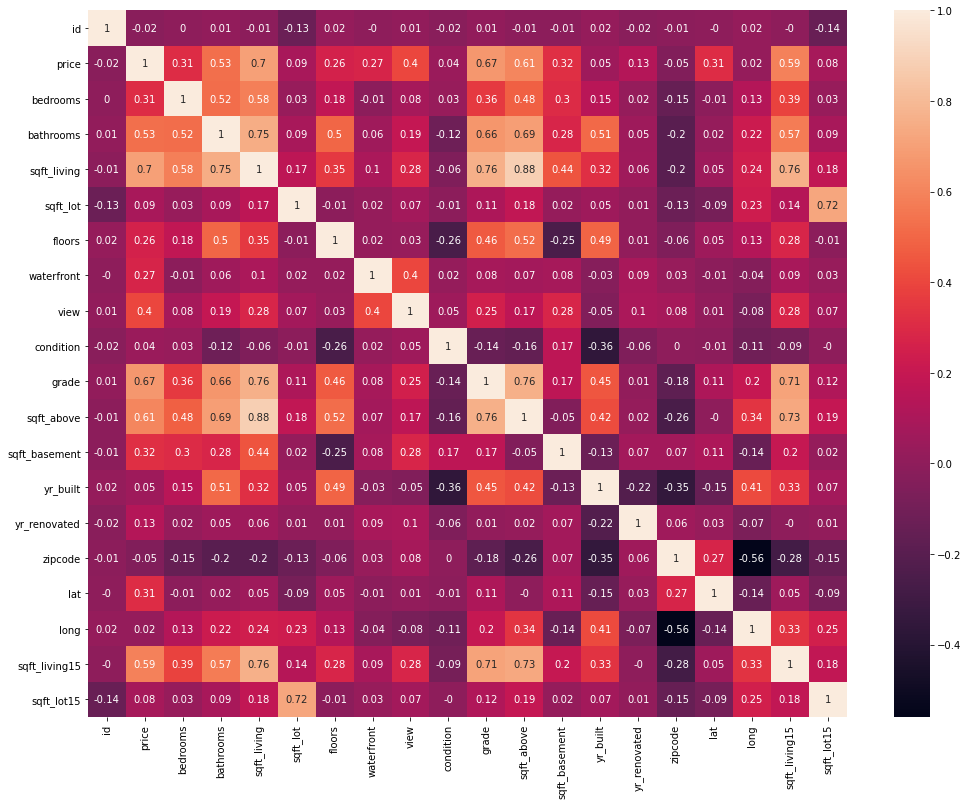

In [9]:
s , ax = plt.subplots( figsize =( 17 , 13 ) )
correlation_matrix = df.corr().round(2)
s=sns.heatmap(data=correlation_matrix, annot=True)

we decideto choose 10 columns plus the 'price' colunm based on the plot correlation where we choosed the columns that have heigh correlation wiht price so  we took correlations columns up then 0.27  ( corr >0.27) 

In [10]:
df=df[['price','bathrooms','sqft_living','floors', 'waterfront', 'view','grade','sqft_above','sqft_basement','lat','sqft_living15']]
df.head()

,price,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,lat,sqft_living15
0,221900.0,1.00,1180,1.0,0,0,7,1180,0,47.5112,1340
1,538000.0,2.25,2570,2.0,0,0,7,2170,400,47.7210,1690
2,180000.0,1.00,770,1.0,0,0,6,770,0,47.7379,2720
3,604000.0,3.00,1960,1.0,0,0,7,1050,910,47.5208,1360
4,510000.0,2.00,1680,1.0,0,0,8,1680,0,47.6168,1800


## observation : 
* we observe from the pairplot  that there are colunms are very correlated like 'sqft_living' and 'sqft_above'
* there is on values in 'waterfront'
* there are 3 values in 'views'
* there are 7 values in 'grade'

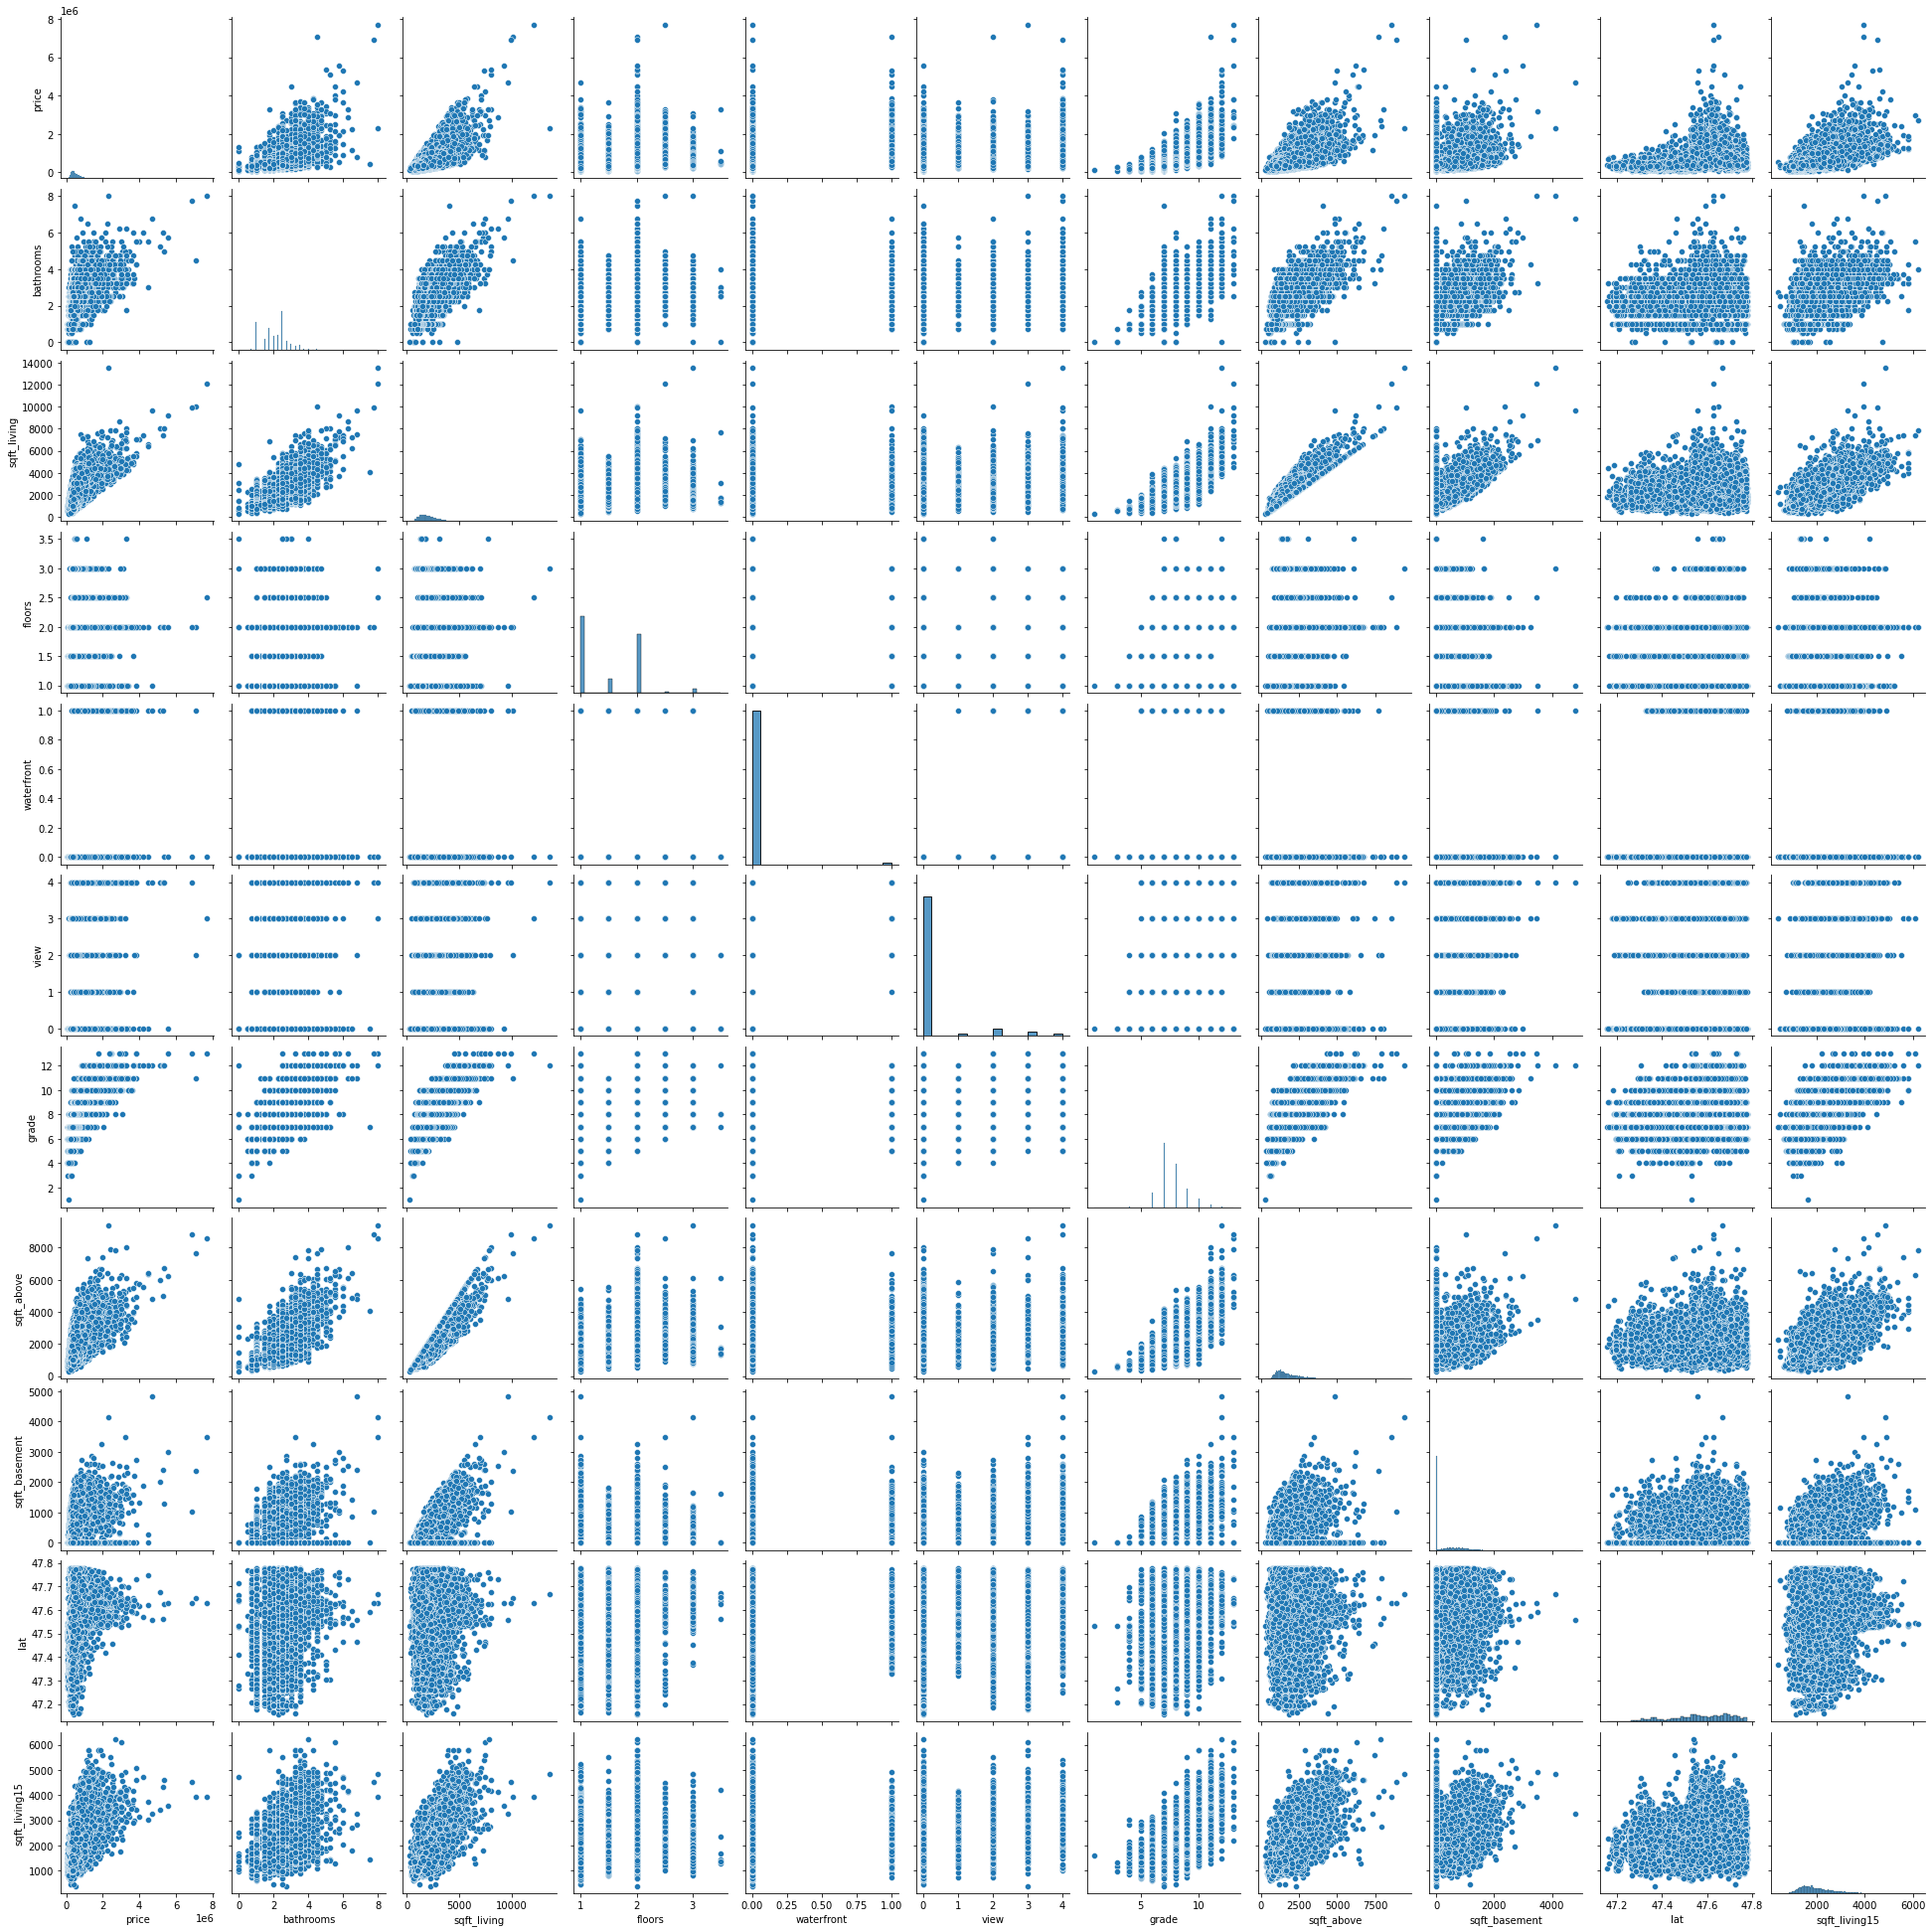

In [11]:
sns.pairplot(df)

# box plot
plot the box plot of columns  to see the min and max + median + the outliers

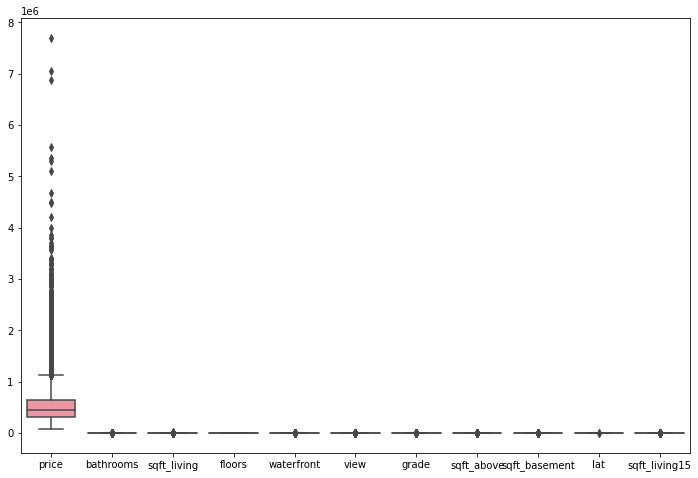

In [12]:
s , ax = plt.subplots( figsize =( 12 , 8 ) )
s=sns.boxplot(data=df)

standaries the boxplot to avoid the scalling

In [13]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
for i in df.columns:
    df[i]=scaler.fit_transform(df[[i]].values)

re_plot the box plot 

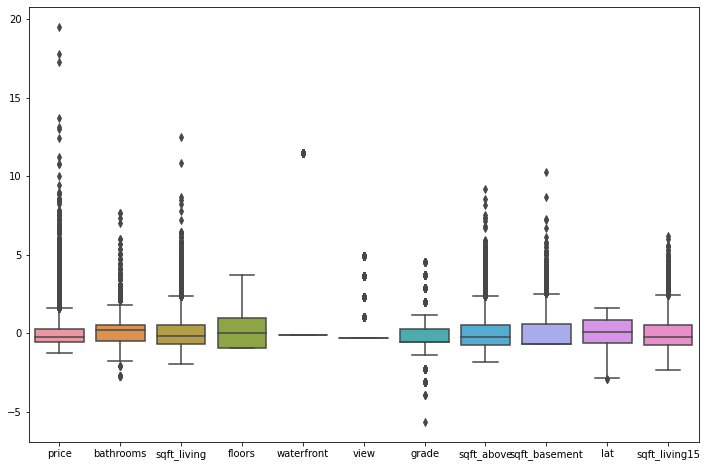

In [14]:
s , ax = plt.subplots( figsize =( 12 , 8 ) )
s=sns.boxplot(data=df)

we should remove the outliers  the clean our data

In [15]:
from scipy import stats
z_scores = stats. zscore(df) 
abs_z_scores = np. abs(z_scores)
filtered_entries = (abs_z_scores < 3). all(axis=1)
df = df[filtered_entries]

we notice that some rows are deleted 

In [16]:
df.shape

(20088, 11)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20088 entries, 0 to 21612
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          20088 non-null  float64
 1   bathrooms      20088 non-null  float64
 2   sqft_living    20088 non-null  float64
 3   floors         20088 non-null  float64
 4   waterfront     20088 non-null  float64
 5   view           20088 non-null  float64
 6   grade          20088 non-null  float64
 7   sqft_above     20088 non-null  float64
 8   sqft_basement  20088 non-null  float64
 9   lat            20088 non-null  float64
 10  sqft_living15  20088 non-null  float64
dtypes: float64(11)
memory usage: 1.8 MB


we notice  some outliers still existing but matter than the 1st  boxplot cuz if we delete all outliers we lose the data 

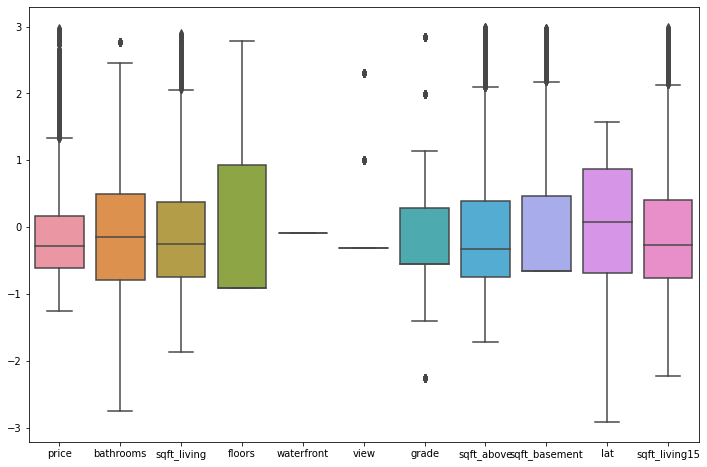

In [18]:
s , ax = plt.subplots( figsize =( 12 , 8 ) )
s=sns.boxplot(data=df)

## Liniar Regression 

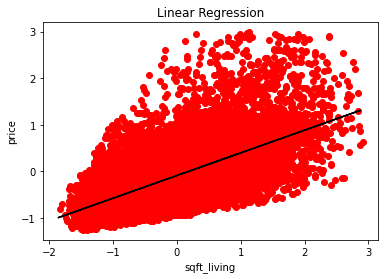

In [74]:
# declaration of the variable X & Y
x=df['sqft_living'].values[:,np.newaxis]
y=df['price'].values

# split the data to training data and testing data 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

 # creat our liniar  regression model and tranin it 
model=LinearRegression()   
model.fit(x_train,y_train)  
predicted=model.predict(x_test)

# prdict the Y_training 
predicted_train=model.predict(x_train)

#plot the liniar regression model
plt.scatter(x_train,y_train,color='r')
plt.title('Linear Regression')
plt.ylabel('price')
plt.xlabel('sqft_living')
plt.plot(x_test,predicted,color="k")
plt.show()

# we choose to plot with 'sqft-living' cuz its have the heigh correlation
#we observe that our model don t predict the X_test in the good way and we think that the  liniar regression dosn t work with this data and this prediction 


we see that the R_square of testing is so low  but there is not a big  diffence btw R_square of trainning and testing

In [75]:
print("MSE", mean_squared_error(y_test,predicted))
print("R squared_testing", metrics.r2_score(y_test,predicted))
print("R squared_training", metrics.r2_score(y_train,predicted_train))

MSE 0.2525281594063976
R squared_testing 0.40430508235366325
R squared_training 0.3853943421756372


# Q_Q plot

we see the y_train and predict of x_train are not identique so  our model is not perfermant and need more  train or more preprocessing or isn t compatible with this prediction 

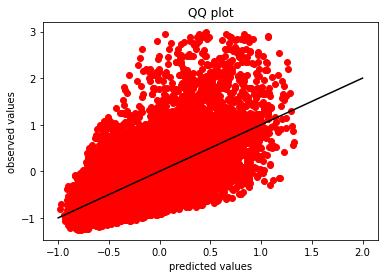

In [76]:
plt.scatter(model.predict(x_train),y_train,color='r')
plt.title('QQ plot')
plt.ylabel('observed values')
plt.xlabel('predicted values')
plt.plot([-1,2],[-1,2],color="k")
plt.show()

## Multi  Liniar_regression

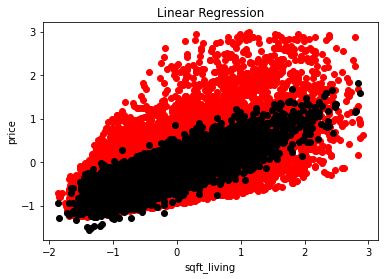

In [89]:
# declaration of the variable X & Y
x=df[['bathrooms','sqft_living','floors', 'waterfront', 'view','grade','sqft_above','sqft_basement','lat','sqft_living15']].values
y=df['price'].values

# split the data to training data and testing data 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40) 

 # creat our liniar  regression model and tranin it
model=LinearRegression() 
model.fit(x_train,y_train) 

# prdict the Y_test and Y_train
predicted=model.predict(x_test)
predicted_train=model.predict(x_train)



#plot the liniar regression model
plt.scatter(x[:,1],y,color='r')
plt.title('Linear Regression')
plt.ylabel('price')
plt.xlabel('sqft_living')
plt.scatter(x_test[:,1],model.predict(x_test),color="k")
plt.show()
 
# we choose to plot with 'sqft-living' cuz its have the heigh correlation   
#we observe that  the predict values cover some of train values where they are approximatly identical btw [-2,0]
# there are more values in up of  predict values  witch mean tat the model doesn t work in correct way but its better than Liniar regression 


we see that R-square is 0.63 it s better than liniar regression  always diffrent btw R_square and train and R_square test is 0.02 and that not big much  

In [78]:
print("MSE", mean_squared_error(y_test,predicted))
print("R squared testing", metrics.r2_score(y_test,predicted))
print("R squared_training", metrics.r2_score(y_train,predicted_train))

MSE 0.15635427291294066
R squared testing 0.6311720405935553
R squared_training 0.6119139458964671


## Q_Q plot 
* the plot is good btw [-2,0] but from 0 to end is not correct witch values observed take another way (to up) 
*so we notice that the multi_liniar regression is half correct and better than liniar regression but it s not hte good one for this prediction 

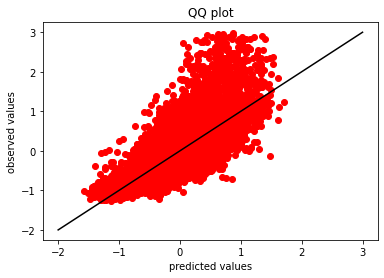

In [79]:
plt.scatter(model.predict(x_train),y_train,color='r')
plt.title('QQ plot')
plt.ylabel('observed values')
plt.xlabel('predicted values')
plt.plot([-2,3],[-2, 3],color="k")
plt.show()

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20088 entries, 0 to 21612
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          20088 non-null  float64
 1   bathrooms      20088 non-null  float64
 2   sqft_living    20088 non-null  float64
 3   floors         20088 non-null  float64
 4   waterfront     20088 non-null  float64
 5   view           20088 non-null  float64
 6   grade          20088 non-null  float64
 7   sqft_above     20088 non-null  float64
 8   sqft_basement  20088 non-null  float64
 9   lat            20088 non-null  float64
 10  sqft_living15  20088 non-null  float64
dtypes: float64(11)
memory usage: 1.8 MB


## Polonomial regression

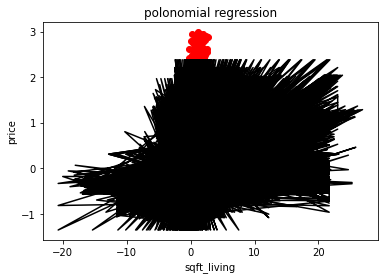

In [103]:
# declaration of the variable X & Y
x=df[['bathrooms','sqft_living','floors', 'waterfront', 'view','grade','sqft_above','sqft_basement','lat','sqft_living15']].values
y=df['price'].values

#converting the independent variables  with degree of polynomial 3
poly = PolynomialFeatures(degree = 3) 
x_train_fit = poly.fit_transform(x_train) 
x_test_fit = poly.fit_transform(x_test)

# split the data to training data and testing data 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

 # training our model
lg=LinearRegression()
lg.fit(x_train_fit, y_train) 

# prdict the Y_test and Y_trian
predicted = lg.predict(x_test_fit)
predicted_train=lg.predict(x_train_fit)

#plot the liniar regression model
plt.scatter(x[:,1],y,color='r')
plt.title("polonomial regression")
plt.ylabel('price')
plt.xlabel('sqft_living')
plt.plot(x_test_fit, lg.predict(x_test_fit), color="k") 


#it dosn t work with scatter cuz with plot  function i can t intepret this plot 


we notice that the R_squade is heigh than the other regression and 0.75 is acceptable where the MSe is 0.1 and we see also that there isno diffrence btw R_square training   and  R_square testin witch means that our model est effective

In [102]:
# len (x_test_fit)
len(lg.predict(x_test_fit))

4018

In [98]:
print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared_testing: ", metrics.r2_score(y_test,predicted))
print("R squared_training: ", metrics.r2_score(y_train,predicted_train))

MSE:  0.10201676541872094
R squared_testing:  0.7593501302290369
R squared_training:  0.7554349791457124


## Q_Q plot 
 we see that our model has progressed with polonomial regression where the QQ plot is accepted and the prediction of X_train is appreximitly identique withe the 1st bicextrice what mean that our model is succeced 

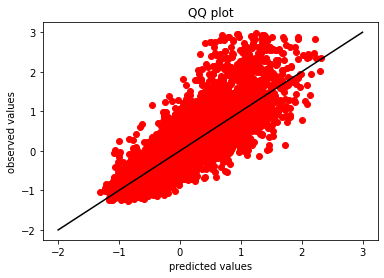

In [67]:
plt.scatter(lg.predict(x_train),y_train,color='r')
plt.title('QQ plot')
plt.ylabel('observed values')
plt.xlabel('predicted values')
plt.plot([-2,3],[-2, 3],color="k")
plt.show()